<a href="https://colab.research.google.com/github/HallelWeinberg/Image-Processing/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Edge Detectors and Pattern Recognition**
In this assignment we will detect edges and find patterns. We will be using Canny edge detector, Hough transform.


In [1]:
import cv2
import numpy as np
from scipy.signal import convolve2d as conv
from scipy.ndimage.filters import gaussian_filter as gaussian
import matplotlib.pyplot as plt

<ipython-input-1-b9cefb560a39>:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter as gaussian


In [2]:
def sobel(im):
    sobel_x = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) / 8
    sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8

    sobel_x = abs(conv(im, sobel_x))
    sobel_y = abs(conv(im, sobel_y))

    new_im = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

    threshold = 8.5
    new_im[new_im <= threshold] = 0
    new_im[new_im > threshold] = 255

    return new_im


def canny(im):
    blur = gaussian(im, sigma=2)
    return cv2.Canny(blur, 60, 180)


def hough_circles(im):
    im_c = im.copy()
    circles = cv2.HoughCircles(im, cv2.HOUGH_GRADIENT_ALT, 1, 20, param1=100, param2=0.9, minRadius=0, maxRadius=100)
    for i in circles[0,:]:
        cv2.circle(im_c, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 255), 3)
    return im_c


def hough_lines(im):
    im_l = im.copy()

    dst = cv2.Canny(im, 200, 300)
    lines = cv2.HoughLines(dst, 1, np.pi / 180, 180)

    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * a))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * a))

        cv2. line(im_l, pt1, pt2, (0, 0, 255), 5)
    return im_l

# Sobel:

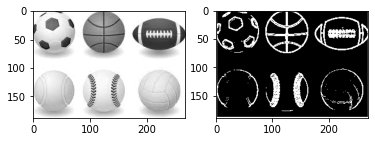

In [3]:
    im = cv2.imread(r'balls1.tif')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_edges = sobel(im)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.subplot(1, 2, 2)
    plt.imshow(im_edges, cmap='gray')
    plt.show()

# Canny:

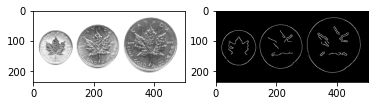

In [4]:
    im = cv2.imread(r'coins1.tif')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_edges = canny(im)  # parameters fitted for coins

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.subplot(1, 2, 2)
    plt.imshow(im_edges, cmap='gray')
    plt.show()

# Hough Circles:

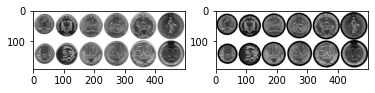

In [5]:
    im = cv2.imread(r'coins3.tif')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_circles = hough_circles(im)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.subplot(1, 2, 2)
    plt.imshow(im_circles, cmap='gray')
    plt.show()

# Hough Lines:

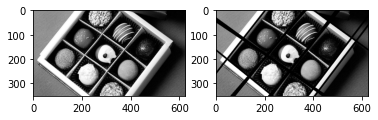

In [6]:
    im = cv2.imread(r'boxOfchocolates1.tif')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(im, cmap='gray')

    im_lines = hough_lines(im)
    plt.subplot(1, 2, 2)
    plt.imshow(im_lines, cmap='gray')
    plt.show()